In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = yf.download("BTC-USD", start="2021-01-01", end="2026-01-06")

[*********************100%***********************]  1 of 1 completed


In [60]:
data = pd.DataFrame(data)
data 

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782
...,...,...,...,...,...
2025-12-31,87508.828125,89080.289062,87130.562500,88429.585938,33830210616
2026-01-01,88731.984375,88803.226562,87399.406250,87508.046875,18849043990


In [5]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
1,2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2,2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
3,2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
4,2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782
...,...,...,...,...,...,...
1824,2025-12-30,88430.132812,89297.937500,86735.546875,87134.351562,35586356225
1825,2025-12-31,87508.828125,89080.289062,87130.562500,88429.585938,33830210616
1826,2026-01-01,88731.984375,88803.226562,87399.406250,87508.046875,18849043990


In [11]:
# data.drop(columns=['Price Ticker'], inplace=True)
data.drop(columns = ['Date','Open','High','Low','Volume'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15340\2672140533.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns = ['Date','Open','High','Low','Volume'], inplace=True)


In [12]:
data

Price,Close
Ticker,BTC-USD
0,29374.152344
1,32127.267578
2,32782.023438
3,31971.914062
4,33992.429688
...,...
1824,88430.132812
1825,87508.828125
1826,88731.984375


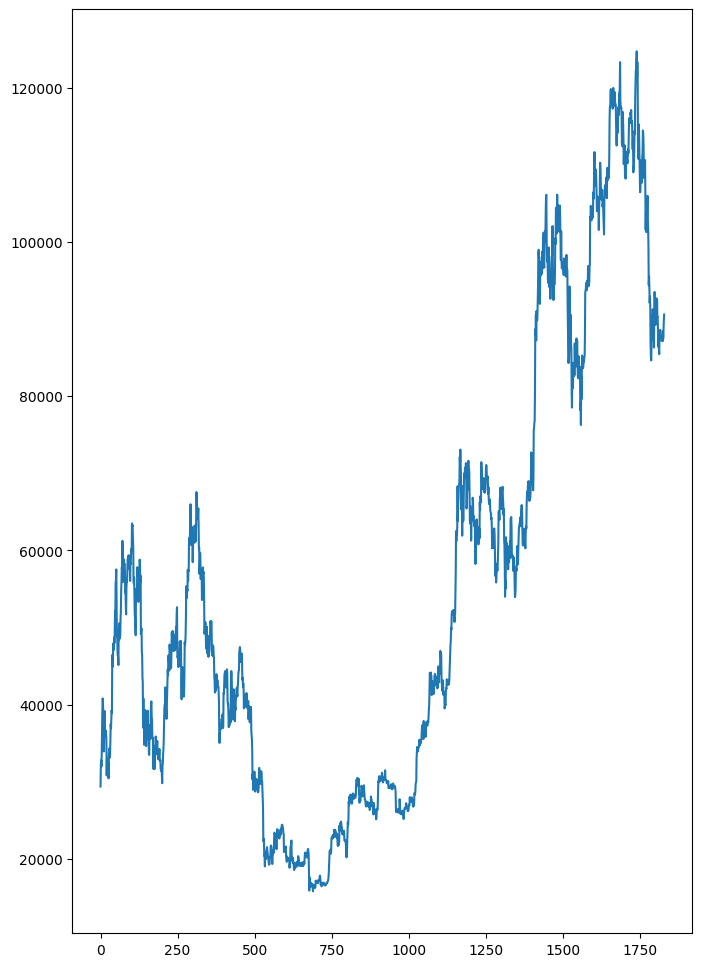

In [13]:
plt.figure(figsize=(8,12))
plt.plot(data)
plt.show()

In [15]:
train_data = data[:-100]
test_data = data[-100:]

In [16]:
train_data.shape

(1729, 1)

In [17]:
test_data.shape

(100, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
train_data_scale = scaler.fit_transform(train_data)

In [20]:
base_days = 100

In [21]:
x = []
y = []
for i in range(base_days,train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])
    

In [22]:
x, y = np.array(x), np.array(y)

In [23]:
x = np.reshape(x,(x.shape[0],x.shape[1])) 

In [24]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [27]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x, y, epochs=1, verbose=1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 205ms/step - loss: 0.0388


In [32]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [34]:
test_data

Price,Close
Ticker,BTC-USD
0,104883.328125
1,104684.289062
2,103309.601562
3,102257.406250
4,100987.140625
...,...
195,88430.132812
196,87508.828125
197,88731.984375


In [35]:
test_data_scale = scaler.transform(test_data)

In [38]:
x = []
y = []

for i in range(base_days, test_data.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [40]:
x,y = np.array(x), np.array(y)

In [41]:
x = np.reshape(x,(x.shape[0],x.shape[1],1))

In [42]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 732ms/step


In [44]:
pred = scaler.inverse_transform(pred)

In [ ]:
pred

array([[107616.5  ],
       [107729.7  ],
       [107809.75 ],
       [107855.2  ],
       [107870.6  ],
       [107862.28 ],
       [107843.2  ],
       [107829.51 ],
       [107838.164],
       [107883.71 ],
       [107978.305],
       [108131.78 ],
       [108345.47 ],
       [108618.84 ],
       [108946.31 ],
       [109308.18 ],
       [109678.98 ],
       [110039.84 ],
       [110376.3  ],
       [110675.234],
       [110923.93 ],
       [111109.4  ],
       [111219.67 ],
       [111247.74 ],
       [111192.914],
       [111061.57 ],
       [110860.62 ],
       [110597.445],
       [110283.266],
       [109931.44 ],
       [109555.96 ],
       [109173.695],
       [108799.64 ],
       [108444.734],
       [108112.875],
       [107802.37 ],
       [107511.09 ],
       [107237.11 ],
       [106979.43 ],
       [106732.14 ],
       [106482.5  ],
       [106220.83 ],
       [105936.586],
       [105624.43 ],
       [105281.04 ],
       [104908.875],
       [104514.64 ],
       [10410

In [46]:
#FUTURE PRICE OF BTC

In [65]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [66]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [ ]:
z

In [ ]:
model.save('BTC_PRICE_PREDICTION_Model.keras')
